In [3]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colorbar as cb
from __future__ import division
from operator import truediv
import copy

In [4]:
#x0 Initial x position (m)
#y0 Initial y position (m)
#g gravitational constant (m/s^2)
#m mass of canon ball (kg)
#B2 = (4*10**-4)*m  Quadratic drag coefficient (1/m)

#v0 inititial velocity (out of canon) (m/s)
#angle angle of canon in degrees
#vx0 = v0*np.cos(angle* 2 *np.pi/360)  #Initial x velocity (m/s)
#vy0 = v0*np.sin(angle* 2 * np.pi/360)   #Initial y velocity (m/s)
#dt    #time step (s)
#alpha = B2/m    If we use this, we have reduced the overall number of parameters we must consider

In [15]:
def dragpositions(x0, y0, v0, angle, dt, alpha):
    g = 9.8 #We are making the assumption that this expirement is occuring on Earth
    
    vx0 = v0*np.cos(angle* 2 *np.pi/360)    #for our cases, the angle will mostly be 0, but this is here for easy adjustment if desired
    vy0 = v0*np.sin(angle* 2 * np.pi/360)
    
    
    x = [x0]
    y = [y0]
    
    xd = [x0]   #the variables ending in 'd' are for the drop term, rather than the launched ball
    yd = [y0]
    
    vx = [vx0]
    vy = [vy0]
    
    vxd = [0]
    vyd = [0]
    
    Fdx = [-alpha * np.sqrt(vx[0]**2 + vy[0]**2)*vx[0]]
    Fdy = [-alpha * np.sqrt(vx[0]**2 + vy[0]**2)*vy[0]]
    
    Fdxd = [0]
    Fdyd = [0]
    
    v = [np.sqrt(vx0**2 + vy0**2)]
    vd = [0]
    
    i=1
    while y[i-1] > 0:
        x.append(x[i-1] + vx[i-1]*dt)
        y.append(y[i-1] + vy[i-1]*dt)

        Fdx.append(-alpha * v[i-1]*vx[i-1])
        Fdy.append(-alpha * v[i-1]*vy[i-1])

        vx.append(vx[i-1] + Fdx[i-1]*dt)
        vy.append(vy[i-1] + (-g)*dt  + (Fdy[i-1])*dt)

        v.append(np.sqrt(vx[i]**2 + vy[i]**2))
        i=i+1
    
    i=1
    while yd[i-1] > 0:
        xd.append(xd[i-1] + vxd[i-1]*dt)
        yd.append(yd[i-1] + vyd[i-1]*dt)
        
        Fdxd.append(-alpha * vd[i-1]*vxd[i-1])
        Fdyd.append(-alpha * vd[i-1]*vyd[i-1])
        
        vxd.append(vxd[i-1] + Fdxd[i-1] * dt)
        vyd.append(vyd[i-1] + (-g)*dt + (Fdyd[i-1])*dt)
        
        vd.append(np.sqrt(vxd[i]**2 + vyd[i]**2))
        i= i+1
    
    #insert code here to approximate final x value and y value as outlined in text
    
    T = ((len(y)))*dt      # this output is for if we want to evaluate how the system evolves with time
    t = np.arange(0,T,dt)
    T = ((len(yd)))*dt
    td = np.arange(0,T,dt)

    return x, y, t, xd, yd, td

In [6]:
x,y,t, xd, yd, td = dragpositions(0, 1000, 700, 0, .0001, (4*10**-4))

(700.0, 0.0)
[  0.00000000e+00   1.00000000e-04   2.00000000e-04 ...,   1.82010000e+01
   1.82011000e+01   1.82012000e+01]
[  0.00000000e+00   1.00000000e-04   2.00000000e-04 ...,   1.52542000e+01
   1.52543000e+01   1.52544000e+01]


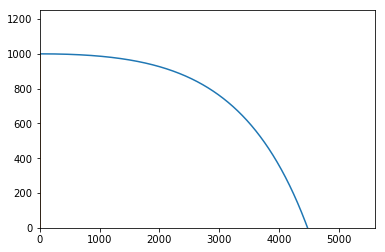

(18.2011, 0.0028187461545602314)
(15.254300000000001, 0.011204982019089364)


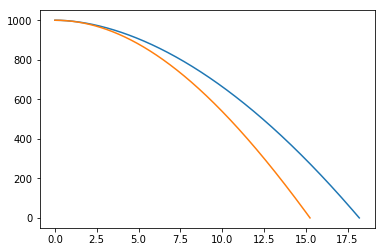

In [7]:
plt.plot(x,y, xd, yd)
plt.axis([-1,1.25*max(x),0,1.25 * max(y)])
plt.show()

print(t[len(t)-2], y[len(y)-2])
print(td[len(td)-2],yd[len(yd)-2])

plt.plot(t,y, td,yd)
plt.show()


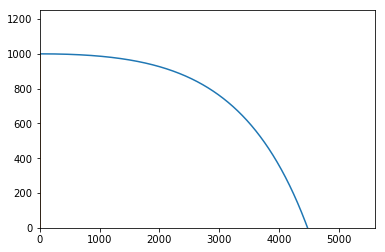

(18.2011, 0.0028187461545602314)
(15.254300000000001, 0.011204982019089364)


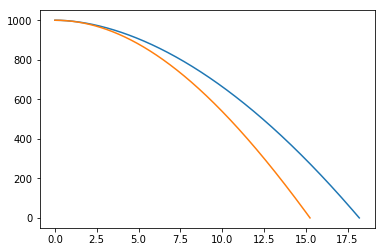

In [8]:
plt.plot(x,y, xd, yd)
plt.axis([-1,1.25*max(x),0,1.25 * max(y)])
plt.show()

print(t[len(t)-2], y[len(y)-2])
print(td[len(td)-2],yd[len(yd)-2])

plt.plot(t,y, td,yd)
plt.show()


In [16]:
def timeratiom(x0, y0, v0, angle, dt, amin, amax):    #Find the time ratios as you vary mass
    tratio = np.arange(amin,amax,(amax-amin)/100)
    i= 0
    for a in np.arange(amin,amax,(amax-amin)/100):
        x,y,t, xd, yd, td = dragpositions(x0, y0, v0, angle, dt, a)
        tratio[i]=(t[-2]-td[-2])
        if i % 10 == 0:
            print(i)
        i=i+1
    return tratio

In [17]:
tr =timeratiom(0, 500, 100, 0, .001, (10**-8),(10) )

0
10
20
30
40
50
60
70


KeyboardInterrupt: 

In [ ]:
len(tr)

In [ ]:
a = np.arange(10**-8,10**-1,(10**-1-10**-8)/100)
len(a)

In [ ]:
plt.plot(a,tr)
plt.ylabel(r'\alpha (1/m)')
plt.xlabel('Time difference ')
plt.show()

In [125]:
a = np.arange(10**-8,10,(10-10**-8)/100)
len(a)

100

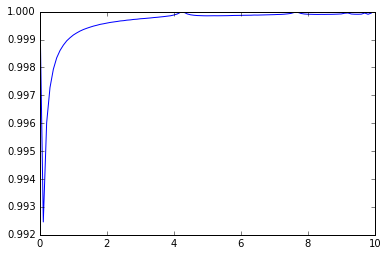

In [126]:
plt.plot(a,tr)
plt.show()

In [4]:
def timeratiov(x0, y0, v0min, v0max, angle, dt, a):    #Find the time ratios as you vary initial velocity
    tratio = np.arange(v0min,v0max,(v0max-v0min)/1000)
    tdiff = np.arange(v0min,v0max,(v0max-v0min)/1000)
    tshot = np.arange(v0min,v0max,(v0max-v0min)/1000)
    tdrop = np.arange(v0min,v0max,(v0max-v0min)/1000)
    
    i= 0
    for v0 in np.arange(v0min,v0max,(v0max-v0min)/1000):
        x,y,t, xd, yd, td = dragpositions(x0, y0, v0, angle, dt, a)
        tratio[i]=(td[len(yd)-1]/t[len(y)-1])
        tdiff[i] = (t[len(y)-1]-td[len(yd)-1])
        tshot[i] = t[len(y)-1]
        tdrop[i] = td[len(yd)-1]
        i=i+1
        if i % 100 == 0:
            print(i)
    return tratio ,tshot, tdrop, tdiff

In [157]:
tv, t, td, tdiff = timeratiov(0, 10, 5, 3000, 0, .001, (4*10**-2))

100
200
300
400
500
600
700
800
900
1000


In [144]:
v = np.arange(5,3000,(3000-5)/1000)

In [145]:
print(tv[10])

0.997907949791


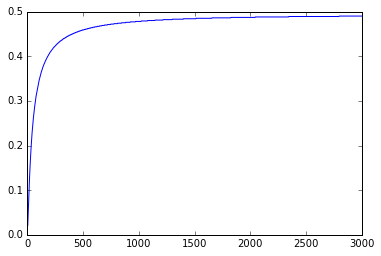

In [158]:
plt.plot(v,tdiff)
plt.show()

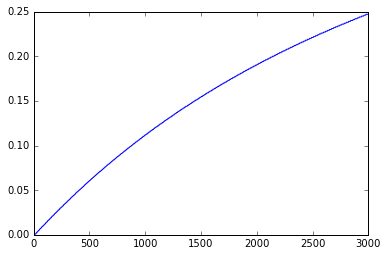

In [150]:
plt.plot(v,tdiff)
plt.show()

In [100]:
tv = timeratiov(0, 100, 100, 1, 1000, 0, .0001, (4*10**-4))

In [101]:
v = np.arange(1,1000,(1000-1)/1000)

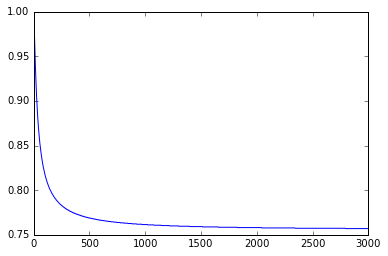

In [159]:
plt.plot(v, tv)
plt.show()

In [14]:
def timeratioy(x0, y0min, y0max, v0, angle, dt, a):
    tratio = np.arange(y0min,y0max,(y0max-y0min)/1000)
    tdiff = np.arange(y0min,y0max,(y0max-y0min)/1000)
    tshot = np.arange(y0min,y0max,(y0max-y0min)/1000)
    tdrop = np.arange(y0min,y0max,(y0max-y0min)/1000)
    
    i= 0
    for y0 in np.arange(y0min,y0max,(y0max-y0min)/1000):
        x,y,t, xd, yd, td = dragpositions(x0, y0, v0, angle, dt, a)
        tratio[i]=(td[len(yd)-1]/t[len(y)-1])
        tdiff[i] = (t[len(y)-1]-td[len(yd)-1])
        tshot[i] = t[len(y)-1]
        tdrop[i] = td[len(yd)-1]
        i=i+1
    return tratio ,tshot, tdrop, tdiff

In [11]:
tratio, timeshot, timedrop, tdiff = timeratioy(0, 1, 100, 700, 0, .001, (4*10**-5))

100
200
300
400
500
600
700
800
900
1000


In [8]:
y = np.arange(1,100, (100-1)/1000)

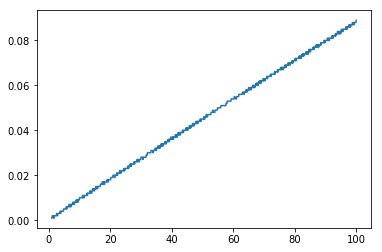

In [13]:
plt.plot(y, tdiff)
plt.show()

In [156]:
def timediffyovera(x0, y0min, y0max, v0, angle, dt, amin, amax):
    tdiff = [[y*j for y in np.arange(y0min, y0max, (y0max-y0min)/1000)] for j in range(0, 20)]
    
    
    j=0
    for a in np.arange(amin, amax, (amax - amin)/20):
        i=0
        for y0 in np.arange(y0min, y0max, (y0max-y0min)/1000):
            x, y, t, xd, yd, td = dragpositions(x0, y0, v0, angle, dt, a)
            tdiff[j][i] = (t[-2]-td[-2])
            i = i+1
        j = j +1
        print(j)
    return tdiff

In [157]:
tdiff = timediffyovera(0,1,100, 700, 0, .001, (10**-6),(10**-1))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [59]:
np.shape(tdiff)

(20, 1000)

In [94]:
from matplotlib.gridspec import GridSpec
cmap = plt.cm.coolwarm  #This sets what color palatte we are using

line_colors = cmap(np.linspace(0,1,20)) #this makes a list of colors to assign our lines to


In [204]:
#dont, need, atall, ydiftimedif =timeratioy(0, 1,100, 700, 0, .001, 4*10**-5)
y0max = 100
y0min = 1
tdiffy = range(0,1000)
i=0
for y0 in np.arange(y0min, y0max, (y0max-y0min)/1000):
    x, y, t, xd, yd, td = dragpositions(0, y0, 700, 0, .001, 10**-3)
    tdiffy[i] = (t[-2]-td[-2])
    i = i+1

(700.0, 0.0)
[ 0.     0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  0.009
  0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
  0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
  0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
  0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
  0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
  0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
  0.07   0.071  0.072  0.073  0.074  0.075  0.076  0.077  0.078  0.079
  0.08   0.081  0.082  0.083  0.084  0.085  0.086  0.087  0.088  0.089
  0.09   0.091  0.092  0.093  0.094  0.095  0.096  0.097  0.098  0.099  0.1
  0.101  0.102  0.103  0.104  0.105  0.106  0.107  0.108  0.109  0.11
  0.111  0.112  0.113  0.114  0.115  0.116  0.117  0.118  0.119  0.12
  0.121  0.122  0.123  0.124  0.125  0.126  0.127  0.128  0.129  0.13
  0.131  0.132  0.133  0.134  0.135  0.136  0.137  0.138  0.13

(700.0, 0.0)
[ 0.     0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  0.009
  0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
  0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
  0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
  0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
  0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
  0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
  0.07   0.071  0.072  0.073  0.074  0.075  0.076  0.077  0.078  0.079
  0.08   0.081  0.082  0.083  0.084  0.085  0.086  0.087  0.088  0.089
  0.09   0.091  0.092  0.093  0.094  0.095  0.096  0.097  0.098  0.099  0.1
  0.101  0.102  0.103  0.104  0.105  0.106  0.107  0.108  0.109  0.11
  0.111  0.112  0.113  0.114  0.115  0.116  0.117  0.118  0.119  0.12
  0.121  0.122  0.123  0.124  0.125  0.126  0.127  0.128  0.129  0.13
  0.131  0.132  0.133  0.134  0.135  0.136  0.137  0.138  0.13

[ 0.     0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  0.009
  0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
  0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
  0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
  0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
  0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
  0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
  0.07   0.071  0.072  0.073  0.074  0.075  0.076  0.077  0.078  0.079
  0.08   0.081  0.082  0.083  0.084  0.085  0.086  0.087  0.088  0.089
  0.09   0.091  0.092  0.093  0.094  0.095  0.096  0.097  0.098  0.099  0.1
  0.101  0.102  0.103  0.104  0.105  0.106  0.107  0.108  0.109  0.11
  0.111  0.112  0.113  0.114  0.115  0.116  0.117  0.118  0.119  0.12
  0.121  0.122  0.123  0.124  0.125  0.126  0.127  0.128  0.129  0.13
  0.131  0.132  0.133  0.134  0.135  0.136  0.137  0.138  0.139  0.14
  0.1

[ 0.     0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  0.009
  0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
  0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
  0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
  0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
  0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
  0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
  0.07   0.071  0.072  0.073  0.074  0.075  0.076  0.077  0.078  0.079
  0.08   0.081  0.082  0.083  0.084  0.085  0.086  0.087  0.088  0.089
  0.09   0.091  0.092  0.093  0.094  0.095  0.096  0.097  0.098  0.099  0.1
  0.101  0.102  0.103  0.104  0.105  0.106  0.107  0.108  0.109  0.11
  0.111  0.112  0.113  0.114  0.115  0.116  0.117  0.118  0.119  0.12
  0.121  0.122  0.123  0.124  0.125  0.126  0.127  0.128  0.129  0.13
  0.131  0.132  0.133  0.134  0.135  0.136  0.137  0.138  0.139  0.14
  0.1

(700.0, 0.0)
[ 0.     0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  0.009
  0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
  0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
  0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
  0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
  0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
  0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
  0.07   0.071  0.072  0.073  0.074  0.075  0.076  0.077  0.078  0.079
  0.08   0.081  0.082  0.083  0.084  0.085  0.086  0.087  0.088  0.089
  0.09   0.091  0.092  0.093  0.094  0.095  0.096  0.097  0.098  0.099  0.1
  0.101  0.102  0.103  0.104  0.105  0.106  0.107  0.108  0.109  0.11
  0.111  0.112  0.113  0.114  0.115  0.116  0.117  0.118  0.119  0.12
  0.121  0.122  0.123  0.124  0.125  0.126  0.127  0.128  0.129  0.13
  0.131  0.132  0.133  0.134  0.135  0.136  0.137  0.138  0.13

  0.902  0.903  0.904  0.905  0.906  0.907  0.908  0.909  0.91   0.911]
[ 0.     0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  0.009
  0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
  0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
  0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
  0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
  0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
  0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
  0.07   0.071  0.072  0.073  0.074  0.075  0.076  0.077  0.078  0.079
  0.08   0.081  0.082  0.083  0.084  0.085  0.086  0.087  0.088  0.089
  0.09   0.091  0.092  0.093  0.094  0.095  0.096  0.097  0.098  0.099  0.1
  0.101  0.102  0.103  0.104  0.105  0.106  0.107  0.108  0.109  0.11
  0.111  0.112  0.113  0.114  0.115  0.116  0.117  0.118  0.119  0.12
  0.121  0.122  0.123  0.124  0.125  0.126  0.127  0.128  0.129  0.13
  0

(700.0, 0.0)
[ 0.     0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  0.009
  0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
  0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
  0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
  0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
  0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
  0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
  0.07   0.071  0.072  0.073  0.074  0.075  0.076  0.077  0.078  0.079
  0.08   0.081  0.082  0.083  0.084  0.085  0.086  0.087  0.088  0.089
  0.09   0.091  0.092  0.093  0.094  0.095  0.096  0.097  0.098  0.099  0.1
  0.101  0.102  0.103  0.104  0.105  0.106  0.107  0.108  0.109  0.11
  0.111  0.112  0.113  0.114  0.115  0.116  0.117  0.118  0.119  0.12
  0.121  0.122  0.123  0.124  0.125  0.126  0.127  0.128  0.129  0.13
  0.131  0.132  0.133  0.134  0.135  0.136  0.137  0.138  0.13

  0.962  0.963  0.964  0.965  0.966  0.967]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.06400000e+00
   1.06500000e+00   1.06600000e+00]
[ 0.     0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  0.009
  0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
  0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
  0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
  0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
  0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
  0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
  0.07   0.071  0.072  0.073  0.074  0.075  0.076  0.077  0.078  0.079
  0.08   0.081  0.082  0.083  0.084  0.085  0.086  0.087  0.088  0.089
  0.09   0.091  0.092  0.093  0.094  0.095  0.096  0.097  0.098  0.099  0.1
  0.101  0.102  0.103  0.104  0.105  0.106  0.107  0.108  0.109  0.11
  0.111  0.112  0.113  0.114  0.115  0.116  0.11

(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.20100000e+00
   1.20200000e+00   1.20300000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.09300000e+00
   1.09400000e+00   1.09500000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.21200000e+00
   1.21300000e+00   1.21400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.10200000e+00
   1.10300000e+00   1.10400000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.22200000e+00
   1.22300000e+00   1.22400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.11100000e+00
   1.11200000e+00   1.11300000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.23300000e+00
   1.23400000e+00   1.23500000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.12000000e+00
   1.12100000e+00   1.12200000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...

[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.63700000e+00
   1.63800000e+00   1.63900000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.45900000e+00
   1.46000000e+00   1.46100000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.64500000e+00
   1.64600000e+00   1.64700000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.46600000e+00
   1.46700000e+00   1.46800000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.65400000e+00
   1.65500000e+00   1.65600000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.47300000e+00
   1.47400000e+00   1.47500000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.66200000e+00
   1.66300000e+00   1.66400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.47900000e+00
   1.48000000e+00   1.48100000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.6700000

(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.93400000e+00
   1.93500000e+00   1.93600000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.70300000e+00
   1.70400000e+00   1.70500000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.94200000e+00
   1.94300000e+00   1.94400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.70900000e+00
   1.71000000e+00   1.71100000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.94900000e+00
   1.95000000e+00   1.95100000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.71500000e+00
   1.71600000e+00   1.71700000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.95600000e+00
   1.95700000e+00   1.95800000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.72100000e+00
   1.72200000e+00   1.72300000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...

   1.92400000e+00   1.92500000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.21100000e+00
   2.21200000e+00   2.21300000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.92800000e+00
   1.92900000e+00   1.93000000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.21800000e+00
   2.21900000e+00   2.22000000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.93300000e+00
   1.93400000e+00   1.93500000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.22400000e+00
   2.22500000e+00   2.22600000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.93900000e+00
   1.94000000e+00   1.94100000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.23100000e+00
   2.23200000e+00   2.23300000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   1.94400000e+00
   1.94500000e+00   1.94600000e+00]
(700.0, 0.0)
[  0.00000000e+00  

[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.46200000e+00
   2.46300000e+00   2.46400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.13000000e+00
   2.13100000e+00   2.13200000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.46800000e+00
   2.46900000e+00   2.47000000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.13500000e+00
   2.13600000e+00   2.13700000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.47400000e+00
   2.47500000e+00   2.47600000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.14000000e+00
   2.14100000e+00   2.14200000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.48000000e+00
   2.48100000e+00   2.48200000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.14400000e+00
   2.14500000e+00   2.14600000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.4860000

[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.67600000e+00
   2.67700000e+00   2.67800000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.30100000e+00
   2.30200000e+00   2.30300000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.68200000e+00
   2.68300000e+00   2.68400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.30600000e+00
   2.30700000e+00   2.30800000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.68700000e+00
   2.68800000e+00   2.68900000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.31000000e+00
   2.31100000e+00   2.31200000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.69300000e+00
   2.69400000e+00   2.69500000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.31500000e+00
   2.31600000e+00   2.31700000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.6980000

(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.90300000e+00
   2.90400000e+00   2.90500000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.48200000e+00
   2.48300000e+00   2.48400000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.90800000e+00
   2.90900000e+00   2.91000000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.48600000e+00
   2.48700000e+00   2.48800000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.91400000e+00
   2.91500000e+00   2.91600000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.49000000e+00
   2.49100000e+00   2.49200000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.91900000e+00
   2.92000000e+00   2.92100000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.49400000e+00
   2.49500000e+00   2.49600000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...

[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.10200000e+00
   3.10300000e+00   3.10400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.63900000e+00
   2.64000000e+00   2.64100000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.10700000e+00
   3.10800000e+00   3.10900000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.64300000e+00
   2.64400000e+00   2.64500000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.11100000e+00
   3.11200000e+00   3.11300000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.64700000e+00
   2.64800000e+00   2.64900000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.11600000e+00
   3.11700000e+00   3.11800000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.65100000e+00
   2.65200000e+00   2.65300000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.1210000

[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.29500000e+00
   3.29600000e+00   3.29700000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.79100000e+00
   2.79200000e+00   2.79300000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.29900000e+00
   3.30000000e+00   3.30100000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.79500000e+00
   2.79600000e+00   2.79700000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.30400000e+00
   3.30500000e+00   3.30600000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.79900000e+00
   2.80000000e+00   2.80100000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.30900000e+00
   3.31000000e+00   3.31100000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.80200000e+00
   2.80300000e+00   2.80400000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.3130000

[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.47900000e+00
   3.48000000e+00   3.48100000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.93600000e+00
   2.93700000e+00   2.93800000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.48300000e+00
   3.48400000e+00   3.48500000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.94000000e+00
   2.94100000e+00   2.94200000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.48800000e+00
   3.48900000e+00   3.49000000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.94300000e+00
   2.94400000e+00   2.94500000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.49200000e+00
   3.49300000e+00   3.49400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   2.94700000e+00
   2.94800000e+00   2.94900000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.4970000

[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.06100000e+00
   3.06200000e+00   3.06300000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.64200000e+00
   3.64300000e+00   3.64400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.06400000e+00
   3.06500000e+00   3.06600000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.64600000e+00
   3.64700000e+00   3.64800000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.06800000e+00
   3.06900000e+00   3.07000000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.65100000e+00
   3.65200000e+00   3.65300000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.07100000e+00
   3.07200000e+00   3.07300000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.65500000e+00
   3.65600000e+00   3.65700000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.0740000

   3.19200000e+00   3.19300000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.80800000e+00
   3.80900000e+00   3.81000000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.19400000e+00
   3.19500000e+00   3.19600000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.81200000e+00
   3.81300000e+00   3.81400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.19700000e+00
   3.19800000e+00   3.19900000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.81600000e+00
   3.81700000e+00   3.81800000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.20100000e+00
   3.20200000e+00   3.20300000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.82000000e+00
   3.82100000e+00   3.82200000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.20400000e+00
   3.20500000e+00   3.20600000e+00]
(700.0, 0.0)
[  0.00000000e+00  

[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.96700000e+00
   3.96800000e+00   3.96900000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.31900000e+00
   3.32000000e+00   3.32100000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.97100000e+00
   3.97200000e+00   3.97300000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.32200000e+00
   3.32300000e+00   3.32400000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.97500000e+00
   3.97600000e+00   3.97700000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.32600000e+00
   3.32700000e+00   3.32800000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.97900000e+00
   3.98000000e+00   3.98100000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.32900000e+00
   3.33000000e+00   3.33100000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.9830000

   3.43500000e+00   3.43600000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.11800000e+00
   4.11900000e+00   4.12000000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.43700000e+00
   3.43800000e+00   3.43900000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.12200000e+00
   4.12300000e+00   4.12400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.44000000e+00
   3.44100000e+00   3.44200000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.12600000e+00
   4.12700000e+00   4.12800000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.44300000e+00
   3.44400000e+00   3.44500000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.13000000e+00
   4.13100000e+00   4.13200000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.44600000e+00
   3.44700000e+00   3.44800000e+00]
(700.0, 0.0)
[  0.00000000e+00  

[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.55700000e+00
   3.55800000e+00   3.55900000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.27600000e+00
   4.27700000e+00   4.27800000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.56000000e+00
   3.56100000e+00   3.56200000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.27900000e+00
   4.28000000e+00   4.28100000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.56300000e+00
   3.56400000e+00   3.56500000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.28300000e+00
   4.28400000e+00   4.28500000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.56600000e+00
   3.56700000e+00   3.56800000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.28700000e+00
   4.28800000e+00   4.28900000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.5690000

(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.42100000e+00
   4.42200000e+00   4.42300000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.67400000e+00
   3.67500000e+00   3.67600000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.42500000e+00
   4.42600000e+00   4.42700000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.67600000e+00
   3.67700000e+00   3.67800000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.42800000e+00
   4.42900000e+00   4.43000000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.67900000e+00
   3.68000000e+00   3.68100000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.43200000e+00
   4.43300000e+00   4.43400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.68200000e+00
   3.68300000e+00   3.68400000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...

   3.77900000e+00   3.78000000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.55900000e+00
   4.56000000e+00   4.56100000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.78100000e+00
   3.78200000e+00   3.78300000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.56200000e+00
   4.56300000e+00   4.56400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.78400000e+00
   3.78500000e+00   3.78600000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.56600000e+00
   4.56700000e+00   4.56800000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.78700000e+00
   3.78800000e+00   3.78900000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.57000000e+00
   4.57100000e+00   4.57200000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.79000000e+00
   3.79100000e+00   3.79200000e+00]
(700.0, 0.0)
[  0.00000000e+00  

[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.68300000e+00
   4.68400000e+00   4.68500000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.87800000e+00
   3.87900000e+00   3.88000000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.68600000e+00
   4.68700000e+00   4.68800000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.88100000e+00
   3.88200000e+00   3.88300000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.69000000e+00
   4.69100000e+00   4.69200000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.88300000e+00
   3.88400000e+00   3.88500000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.69300000e+00
   4.69400000e+00   4.69500000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.88600000e+00
   3.88700000e+00   3.88800000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.6970000

[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.80700000e+00
   4.80800000e+00   4.80900000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.97500000e+00
   3.97600000e+00   3.97700000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.81100000e+00
   4.81200000e+00   4.81300000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.97800000e+00
   3.97900000e+00   3.98000000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.81400000e+00
   4.81500000e+00   4.81600000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.98000000e+00
   3.98100000e+00   3.98200000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.81800000e+00
   4.81900000e+00   4.82000000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   3.98300000e+00
   3.98400000e+00   3.98500000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.8210000

[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.93300000e+00
   4.93400000e+00   4.93500000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.07400000e+00
   4.07500000e+00   4.07600000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.93600000e+00
   4.93700000e+00   4.93800000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.07500000e+00
   4.07600000e+00   4.07700000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.94000000e+00
   4.94100000e+00   4.94200000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.07900000e+00
   4.08000000e+00   4.08100000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.94300000e+00
   4.94400000e+00   4.94500000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.08200000e+00
   4.08300000e+00   4.08400000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.9460000

   4.16400000e+00   4.16500000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.05200000e+00
   5.05300000e+00   5.05400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.16600000e+00
   4.16700000e+00   4.16800000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.05500000e+00
   5.05600000e+00   5.05700000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.16800000e+00
   4.16900000e+00   4.17000000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.05900000e+00
   5.06000000e+00   5.06100000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.17100000e+00
   4.17200000e+00   4.17300000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.06200000e+00
   5.06300000e+00   5.06400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.17400000e+00
   4.17500000e+00   4.17600000e+00]
(700.0, 0.0)
[  0.00000000e+00  

[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.26500000e+00
   4.26600000e+00   4.26700000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.18200000e+00
   5.18300000e+00   5.18400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.26700000e+00
   4.26800000e+00   4.26900000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.18500000e+00
   5.18600000e+00   5.18700000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.27000000e+00
   4.27100000e+00   4.27200000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.18900000e+00
   5.19000000e+00   5.19100000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.27200000e+00
   4.27300000e+00   4.27400000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.19200000e+00
   5.19300000e+00   5.19400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.2750000

(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.30000000e+00
   5.30100000e+00   5.30200000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.35900000e+00
   4.36000000e+00   4.36100000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.30300000e+00
   5.30400000e+00   5.30500000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.36200000e+00
   4.36300000e+00   4.36400000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.30600000e+00
   5.30700000e+00   5.30800000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.36400000e+00
   4.36500000e+00   4.36600000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.30900000e+00
   5.31000000e+00   5.31100000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.36600000e+00
   4.36700000e+00   4.36800000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...

(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.41200000e+00
   5.41300000e+00   5.41400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.44700000e+00
   4.44800000e+00   4.44900000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.41500000e+00
   5.41600000e+00   5.41700000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.44900000e+00
   4.45000000e+00   4.45100000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.41800000e+00
   5.41900000e+00   5.42000000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.45200000e+00
   4.45300000e+00   4.45400000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.42200000e+00
   5.42300000e+00   5.42400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.45400000e+00
   4.45500000e+00   4.45600000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...

(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.53200000e+00
   5.53300000e+00   5.53400000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.54000000e+00
   4.54100000e+00   4.54200000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.53500000e+00
   5.53600000e+00   5.53700000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.54300000e+00
   4.54400000e+00   4.54500000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.53800000e+00
   5.53900000e+00   5.54000000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.54500000e+00
   4.54600000e+00   4.54700000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   5.54100000e+00
   5.54200000e+00   5.54300000e+00]
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   4.54700000e+00
   4.54800000e+00   4.54900000e+00]
(700.0, 0.0)
[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...

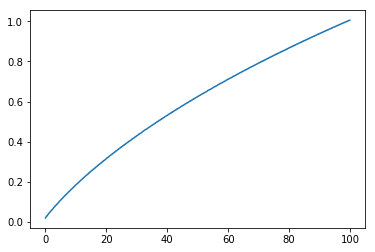

In [199]:
plt.plot(np.arange(0,100,.1),tdiffy)

In [195]:
print(tdiffy)

[0.0, 0.0, 0.0, 0.0010000000000000009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010000000000000009, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010000000000001119, 0.0, 0.0, 0.0, 0.0010000000000001119, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010000000000001119, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010000000000001119, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010000000000001119, 0.00099999999999988987, 0.0010000000000001119, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00099999999999988987, 0.0, 0.0, 0.0, 0.0010000000000001119, 0.0, 0.0, 0.0, 0.0, 0.0010000000000001119, 0.0, 0.0, 0.0, 0.0, 0.0010000000000001119, 0.0, 0.0, 0.00099999999999988987, 0.0, 0.0, 0.0010000000000001119, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00099999999999988987, 0.00099999999999988987, 0.0010000000000001119, 0.0010000000000001119, 0.

<function matplotlib.pyplot.show>

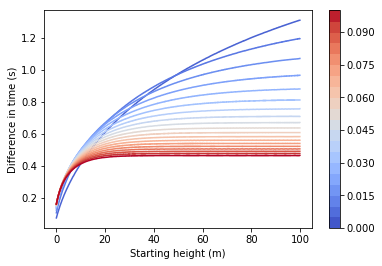

In [173]:
#sm = plt.cm.ScalarMappable(cmap=cmap) 
#sm._A = []
#cb.set_ticks(np.arange(10**-8,10**-1,(10**-1-10**-1)/20))
#plt.colorbar(sm)

#used http://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots to make most of legend
Z = [[0,0],[0,0]]
levels = np.arange(10**-6,10**-1+(10**-1-10**-6)/20,(10**-1-10**-6)/20)
CS3 = plt.contourf(Z, levels, cmap=cmap)
plt.ticklabel_format(axis='CS3', style='sci')
plt.clf()


for i in range(1,20):
    plt.plot(np.arange(0,100,.1),tdiff[i],color=line_colors[i])


plt.ylabel('Difference in time (s)')
plt.xlabel(r'Starting height (m)',fontsize=10)
plt.colorbar(CS3)
plt.show

In [179]:
def timediffyoverv(x0, y0min, y0max, v0min, v0max, angle, dt, a):
    tdiff = [[y*j for y in np.arange(y0min, y0max, (y0max-y0min)/1000)] for j in range(0, 20)]
    
    
    j=0
    for v0 in np.arange(v0min, v0max, (v0max - v0min)/20):
        i=0
        for y0 in np.arange(y0min, y0max, (y0max-y0min)/1000):
            x, y, t, xd, yd, td = dragpositions(x0, y0, v0, angle, dt, a)
            tdiff[j][i] = (t[-2]-td[-2])
            i = i+1
        j = j +1
        print(j)
    return tdiff

In [188]:
timedifoveryandv = timediffyoverv(0,1,100,1,1000,0,.001,4*10**-3)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


<function matplotlib.pyplot.show>

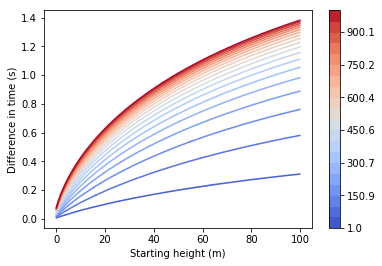

In [189]:
#adapted largely from http://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots to make most of legend
Z = [[0,0],[0,0]]
levels = np.arange(1,1000+(1000-1)/20,(1000-1)/20)
CS3 = plt.contourf(Z, levels, cmap=cmap)
plt.ticklabel_format(axis='CS3')
plt.clf()


for i in range(1,20):
    plt.plot(np.arange(0,100,.1),timedifoveryandv[i],color=line_colors[i])


plt.ylabel('Difference in time (s)')
plt.xlabel(r'Starting height (m)',fontsize=10)
plt.colorbar(CS3)
plt.show